# 01 – Exploratory Data Analysis (EDA)

This notebook performs an initial exploratory data analysis (EDA) of the synthetic dataset `synthetic_lung_cancer_data.csv` used in the lung cancer ML study.

We will:
- Inspect the structure of the dataset (columns, types, basic statistics).
- Look at value counts for important variables such as `Smoking`, `Dyspnea`, `Coughing Blood`, and `Lung Cancer`.
- Visualise simple distributions (histogram of Age, bar plots for key categorical variables).
- Demonstrate how to check for missing values, even though this synthetic dataset is constructed without systematic missingness.

The goal is to understand the data before moving on to preprocessing and model building.


In [ ]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Configure basic plotting style
sns.set(style="whitegrid", context="notebook")

DATA_PATH = Path("..") / "data" / "synthetic_lung_cancer_data.csv"

if not DATA_PATH.exists():
    raise FileNotFoundError(f"Could not find dataset at {DATA_PATH}")

# Load the synthetic dataset
# keep_default_na=False ensures the string "None" is treated as a literal category
# instead of being converted into NaN.
df = pd.read_csv(DATA_PATH, keep_default_na=False)

df.head()


,Gender,Age,Smoking,Family History of Cancer,Dyspnea,Chest Pain,Weight Loss,Coughing,Previous Lung Disease,Occupational Hazards,Pollution Level in Residence City,Allergy,Coughing Blood,Immediate Family Smokers,Fatigue,Hoarseness of Voice,Lung Cancer
0,Male,34,Never Smoker,No,Moderate,None,None,Yes,Yes,None,High,No,No,Yes,No,None,No
1,Female,55,Never Smoker,Yes,None,Severe,None,No,Yes,None,High,Yes,No,No,No,None,No
2,Male,68,Never Smoker,No,None,None,None,No,No,High,High,Yes,No,No,No,Mild,No
3,Male,65,Never Smoker,Yes,None,Mild,None,No,No,High,Moderate,No,No,Yes,No,Mild,Yes
4,Female,24,Former Smoker,No,Moderate,None,None,Yes,No,Low,High,No,No,Yes,No,Mild,No


In [ ]:
# Basic info and descriptive statistics

print("Shape (rows, columns):", df.shape)
print("\nData types:")
print(df.dtypes)

print("\nSummary statistics for numeric columns:")
display(df.describe())


Shape (rows, columns): (230, 17)

Data types:
Gender                               object
Age                                   int64
Smoking                              object
Family History of Cancer             object
Dyspnea                              object
Chest Pain                           object
Weight Loss                          object
Coughing                             object
Previous Lung Disease                object
Occupational Hazards                 object
Pollution Level in Residence City    object
Allergy                              object
Coughing Blood                       object
Immediate Family Smokers             object
Fatigue                              object
Hoarseness of Voice                  object
Lung Cancer                          object
dtype: object

Summary statistics for numeric columns:


,Age
count,230.000000
mean,54.439130
std,18.595047
min,20.000000
25%,38.250000
50%,55.000000
75%,69.750000
max,85.000000


In [ ]:
# Checking for missing values

print("Missing values per column:\n")
print(df.isna().sum())


Missing values per column:

Gender                               0
Age                                  0
Smoking                              0
Family History of Cancer             0
Dyspnea                              0
Chest Pain                           0
Weight Loss                          0
Coughing                             0
Previous Lung Disease                0
Occupational Hazards                 0
Pollution Level in Residence City    0
Allergy                              0
Coughing Blood                       0
Immediate Family Smokers             0
Fatigue                              0
Hoarseness of Voice                  0
Lung Cancer                          0
dtype: int64


### Comment on Missing Values

The original clinical dataset from Neera Hospital contained missing values in several symptom and history fields (e.g., family history of cancer, dyspnea, chest pain, weight loss, previous lung disease, occupational hazards, allergy, and immediate family smokers). In the original study, rows with missing values in these columns were **dropped** before modelling.

The synthetic dataset in this repository is constructed to be complete for simplicity, but the above cell demonstrates how one would **check for missing values** in practice. The same logic will be used in the preprocessing notebook when we simulate the dropping of incomplete rows.


In [ ]:
# Value counts for key categorical variables

key_columns = [
    "Smoking",
    "Dyspnea",
    "Coughing Blood",
    "Lung Cancer",
]

for col in key_columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for Smoking:
Smoking
Current Smoker    89
Never Smoker      75
Former Smoker     66
Name: count, dtype: int64

Value counts for Dyspnea:
Dyspnea
None        74
Mild        72
Moderate    54
Severe      30
Name: count, dtype: int64

Value counts for Coughing Blood:
Coughing Blood
No     202
Yes     28
Name: count, dtype: int64

Value counts for Lung Cancer:
Lung Cancer
No     151
Yes     79
Name: count, dtype: int64


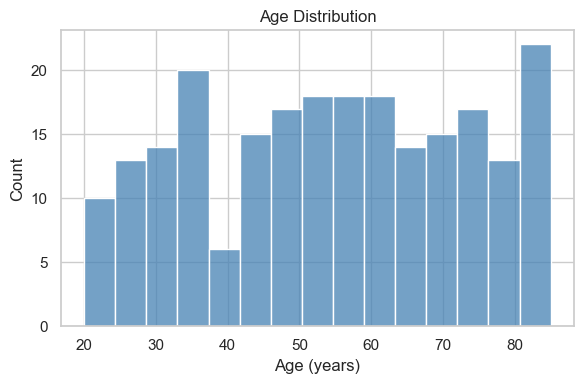

In [ ]:
# Distribution of Age

plt.figure(figsize=(6, 4))
sns.histplot(df["Age"], bins=15, kde=False, color="steelblue")
plt.title("Age Distribution")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


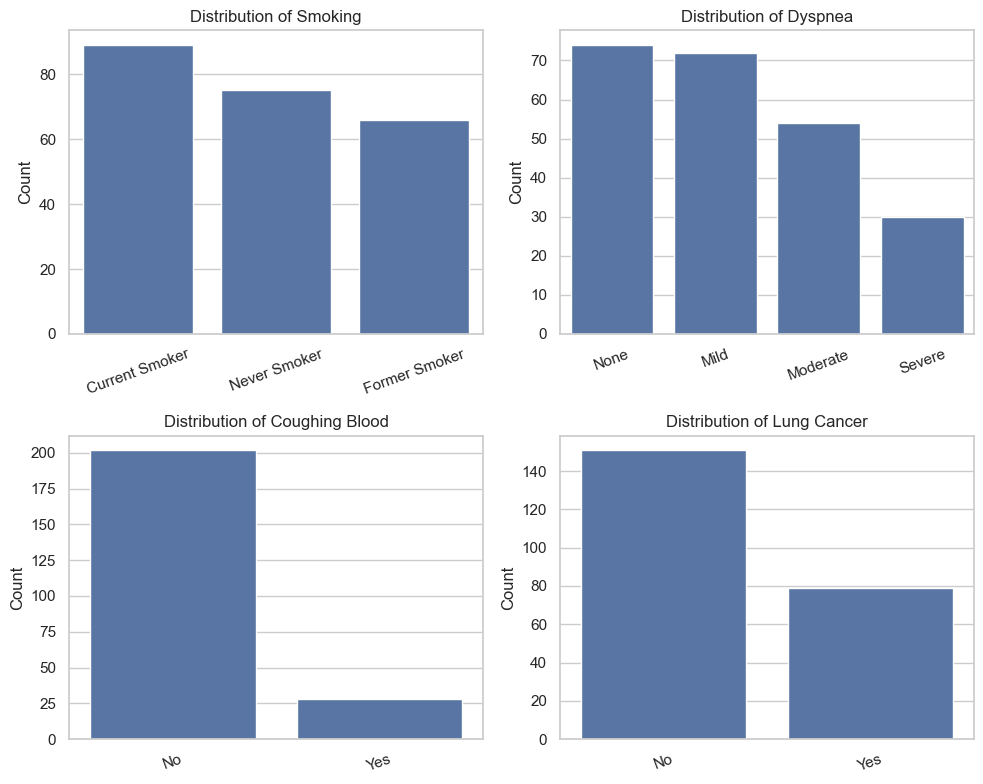

In [ ]:
# Bar plots for selected categorical features

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

categorical_to_plot = ["Smoking", "Dyspnea", "Coughing Blood", "Lung Cancer"]

for ax, col in zip(axes, categorical_to_plot):
    order = df[col].value_counts().index  # avoids sorting issues if NaN appears
    sns.countplot(x=df[col], ax=ax, order=order)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=20)

plt.tight_layout()
plt.show()


### Observations from EDA

- The synthetic dataset shows a reasonable spread of ages between young adults and older patients, with more cases in older age groups, reflecting higher lung cancer risk with age.
- Smoking categories (`Never Smoker`, `Former Smoker`, `Current Smoker`) are all represented, with a higher proportion of **current smokers** among lung cancer cases by construction.
- Respiratory symptoms such as **dyspnea** and **coughing blood** are more common in synthetic patients with `Lung Cancer = Yes`, mimicking the patterns described in the original study.
- Both `Lung Cancer = Yes` and `Lung Cancer = No` are well represented, so the classification task is not extremely imbalanced.

These patterns will guide the subsequent preprocessing, encoding, and model training steps in the following notebooks.
